# DATA 601 Project
    Domestic Movie Analysis from 1972-2023 – Have Domestic Films Gotten Worse?
    
#### By:
* Brian Englum
* Tyler Snow
* Joel Wheatley
* Kumar Pasupuleti

> **Purpose:**
> * Many movie fans and film critics believe that U.S. domestic movies have deteriorated in quality over time. Classic blockbusters like "The Godfather," "The Terminator," the Star Wars Episodes IV-VI seem to be a thing of the past. Studios and producers appear to be more interested in making animations; plot-absent, visually entertaining films; and never-ending sequels than making truly original, creative films.
> * Although viewers and critics may feel this way, little research has been done on the topic.
> * The goal of this project is to use statistical analysis and data science tools to explore this topic and come to a conclusion, one way or another.  

## First Steps

In [138]:
# Imports
import pandas as pd
import csv
import numpy as np
import plotly.express as px
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Prevent warning messages from appearing.
import warnings
warnings.filterwarnings("ignore")

In [140]:
# Create initial DataFrame from movie_data.csv
df = pd.read_csv('https://raw.githubusercontent.com/tsnow2010/DATA601/refs/heads/main/DATA601_Project1/data/movie_data.csv')
print(f'This dataset has {df.shape[0]} movies.' )
df.sample(1)

This dataset has 16328 movies.


,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
10690,Holiday Rush,2019.0,"Comedy, Drama, Family",5.0,40,NaN,5.6,"3,192",3 nominations,NaN,movie,Leslie Small,United States


## I: Data Cleaning

### Step 1) Restrict years used from 1972 to 2023.  Extreme outliers or no data exists for movies outside these ranges.

In [141]:
df = df[(df['Year'] >= 1972.0) & (df['Year'] <= 2023.0)]

### Step 2) Remove '$' and ',' char's from the GDBOS column values and turns them into <<float>>.

In [142]:
df['Gross Domestic Box Office Sales ($)'] = df['Gross Domestic Box Office Sales ($)'].astype(str).apply(lambda x: ''.join([char for char in x if char not in ['$',',']])).astype(float)
df.sample(1)

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
12019,Minions: The Rise of Gru,2022.0,"Animation, Adventure, Comedy",6.5,69,56.0,7.325,"93,021",1 win & 18 nominations,370270765.0,movie,"Kyle Balda, Brad Ableson, Jonathan del Val","United States, France"


### Step 3) Create a DataFrame (df_movie_ratings) that allows data analysis of movie rating metrics.
- Change rating system values from str to float.
- Drop NaN values.

In [143]:
# Changes rating system values (EXCEPT RT) from str to float.

df['IMDB'] = df['IMDB'].astype(float)
df['Metacritic'] = df['Metacritic'].astype(float)
df['TMDB'] = df['TMDB'].astype(float)
df['Rotten_tom'] = pd.to_numeric(df['Rotten Tomatoes'], errors='coerce')
df['IMDB_votes'] = pd.to_numeric(df['# of IMDB Votes'].str.replace(',', ''), errors='coerce')


# Assigns 'None' to invalid RT ratings, i.e. '31/10' and etc, and removes them in df_movie_ratings.

def clean_rotten_tom(rtg):
    if type(rtg) is str:
        if '/' in rtg:
            return None
        else:
            return rtg
    else:
        return rtg

print("Number of movies BEFORE removing 'bad' RT ratings:", df.shape[0])

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(clean_rotten_tom)
df_RT = df.dropna(subset='Rotten Tomatoes')

print("Number of movies AFTER removing 'bad' RT ratings:", df_RT.shape[0])

df_RT['Rotten Tomatoes'] = df_RT['Rotten Tomatoes'].astype(float)

df = df.reset_index(drop=True)

df.sample(1)

Number of movies BEFORE removing 'bad' RT ratings: 16001
Number of movies AFTER removing 'bad' RT ratings: 11053


,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin,Rotten_tom,IMDB_votes
1979,The Stepfather,2009.0,"Mystery, Thriller",5.6,13,33.0,5.823,"39,620",2 nominations,29062561.0,movie,Nelson McCormick,United States,13.0,39620.0


### Step 4) Remove international movies.

In [144]:
def check_foreign(origin):
  try:
    if ('United States' in origin) or ('USA' in origin):
      return True
    else:
      return False
  except:
    return False

print("Number of movies BEFORE removing international movies or those with NaN values:", df.shape[0])

# Drop movies with NaN in "Origin"
df.dropna(subset='Origin')

# Check international status of movies.
df['Domestic?'] = df['Origin'].apply(check_foreign)

# Remove movies without "United States" in 'Origin'
df = df[df['Domestic?'] == True]

print("Number of movies AFTER removing international movies or those with NaN values:", df.shape[0])



Number of movies BEFORE removing international movies or those with NaN values: 16001
Number of movies AFTER removing international movies or those with NaN values: 12018


      Year  count
51  1972.0    108
39  1973.0    162
44  1974.0    142
43  1975.0    143
46  1976.0    141
50  1977.0    127
42  1978.0    144
49  1979.0    127
41  1980.0    155
47  1981.0    131
45  1982.0    142
48  1983.0    129
38  1984.0    169
37  1985.0    170
31  1986.0    195
32  1987.0    193
23  1988.0    247
30  1989.0    199
33  1990.0    191
29  1991.0    203
34  1992.0    188
27  1993.0    228
28  1994.0    222
25  1995.0    239
18  1996.0    258
24  1997.0    243
22  1998.0    249
21  1999.0    251
15  2000.0    274
20  2001.0    251
14  2002.0    276
16  2003.0    272
19  2004.0    251
10  2005.0    298
9   2006.0    305
3   2007.0    352
2   2008.0    354
4   2009.0    351
8   2010.0    315
6   2011.0    334
7   2012.0    330
26  2013.0    237
36  2014.0    179
40  2015.0    159
35  2016.0    180
17  2017.0    260
11  2018.0    298
13  2019.0    289
12  2020.0    297
1   2021.0    355
0   2022.0    356
5   2023.0    349


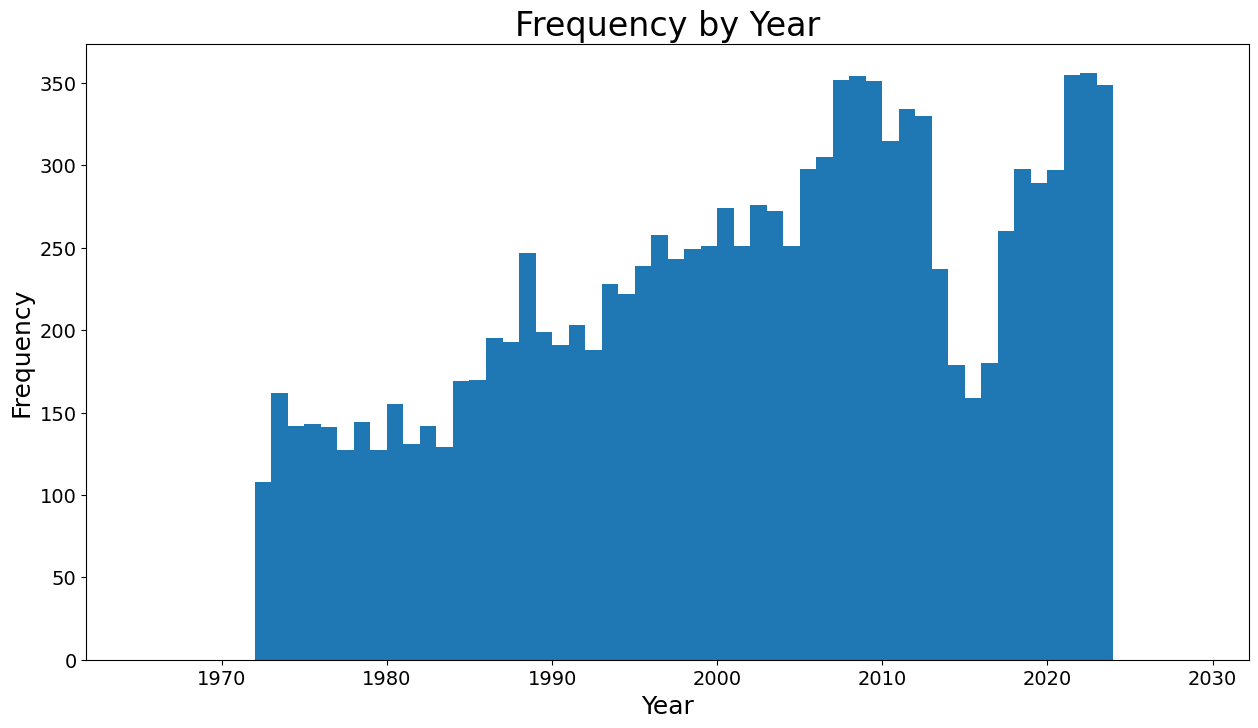

In [145]:
#Evaluate Year
print(df['Year'].value_counts().reset_index().sort_values('Year'))

#Histogram of year
plt.figure(figsize=(15,8))
plt.hist(df.Year, bins=np.arange(1965, 2030))
plt.title('Frequency by Year', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.savefig('histo_year.jpg', format='jpg', dpi=300)

In [146]:
#Convert year from float to int (remove NaN, then replace NaN)
df['Year_int'] = df['Year'].astype(str)
df['Year_int'] = df['Year_int'].str.slice(0, -2)
df['Year_int'][df['Year'].isnull()] = np.nan

df['filmyear'] = df['Title'] + '_' + df['Year_int']

In [147]:
#Combine all the genres listed into a giant list then use set to get rid of all duplicates
df['Genre(s)'][pd.isna(df['Genre(s)'])] = ''
Genres = list(df['Genre(s)'])
Genres2 = []
for i in range(len(Genres)):
    Genres2.append(re.split(', ', Genres[i]))
flat_genres = [
    genres1
    for genres2 in Genres2
    for genres1 in genres2
]
set_genres = set(flat_genres)
all_genres = sorted(list(set_genres))
all_genres.remove('')

# BELOW THROWS ERROR

In [148]:
# Make all genres individual columns with binary True or False values
for i in all_genres:
    df[i] = False
    for j in range(len(df['Genre(s)'])):
        if i in df['Genre(s)'][j]:
            df[i][j] = True

KeyError: 152

In [ ]:
# Bar Graph of Genres
x=list()
for i in all_genres:
    x.append(df[i].sum())
GenreTable = pd.DataFrame({'Genre': all_genres, 'Freq': x})

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(GenreTable.Genre, GenreTable.Freq)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Frequency by Genre', fontsize=24)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tight_layout()
plt.savefig('bargraph_genre.jpg', format='jpg', dpi=300, bbox_inches='tight')

In [ ]:
#Combine Action/Adventure Genres into 'Action'
df['Action'][df['Adventure']==True] = True

#Combine Music/Muscial Genres into 'Music'
df['Music'][df['Musical']==True] = True

#Create 'Other Genre' from smaller genres
other_genres = ['Adult', 'Game-Show', 'News', 'Reality-TV', 'Short', 'Sport', 'Talk-Show', 'War', 'Western']
df['Other Genre'] = 0
for i in other_genres:
    df['Other Genre'][df[i]==True] = True

#Drop smaller genres
df = df.drop(columns=['Adventure', 'Adult', 'Game-Show', 'Musical', 'News', 'Reality-TV', 'Short', 'Sport', 'Talk-Show', 'War', 'Western'])

In [ ]:
print(all_genres)
to_remove = ('Adventure', 'Adult', 'Game-Show', 'Musical', 'News', 'Reality-TV', 'Short', 'Sport', 'Talk-Show', 'War', 'Western')
all_genres = [genre for genre in all_genres if genre not in to_remove]
all_genres.append('Other Genre')
len(all_genres)

In [ ]:
#Bar Graph of Genres
x=list()
for i in all_genres:
    x.append(df[i].sum())
GenreTable = pd.DataFrame({'Genre': all_genres, 'Freq': x})

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(GenreTable.Genre, GenreTable.Freq)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Frequency by Genre', fontsize=24)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tight_layout()
plt.savefig('bargraph_genre.jpg', format='jpg', dpi=300, bbox_inches='tight')

In [ ]:
# Create plot of different rating systems TMDB, IMDB, Rotten Tomatoes, and Metacritic
# Also inserted sum of missing values into each plot

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
tf = 18
fig.suptitle('Histogram of Rating Systems', fontsize=24)


axs[0, 0].hist(df.TMDB, bins=np.arange(0, 11, 0.5))
axs[0, 0].set_title('TMDB', fontsize=tf)
axs[0, 0].text(1, 2000, s = 'Missing: ' + str(df.TMDB.isna().sum()), fontsize=14)
axs[0, 0].set_xticks(np.arange(0, 11, 1))
axs[0, 0].set_xticklabels(np.arange(0, 11, 1), fontsize=12)
axs[0, 0].set_yticks(np.arange(0, 4001, 500))
axs[0, 0].set_yticklabels(np.arange(0, 4001, 500), fontsize=12)

axs[0, 1].hist(df.IMDB, bins=np.arange(1, 11, 0.5))
axs[0, 1].set_title('IMDB', fontsize=tf)
axs[0, 1].text(1, 1750, s = 'Missing: ' + str(df.IMDB.isna().sum()), fontsize=14)
axs[0, 1].set_xticks(np.arange(0, 11, 1))
axs[0, 1].set_xticklabels(np.arange(0, 11, 1), fontsize=12)
axs[0, 1].set_yticks(np.arange(0, 3001, 500))
axs[0, 1].set_yticklabels(np.arange(0, 3001, 500), fontsize=12)

axs[1, 0].hist(df.Rotten_tom, bins=np.arange(0, 101, 5))
axs[1, 0].set_title('Rotten Tomatoes', fontsize=tf)
axs[1, 0].text(1, 550, s = 'Missing: ' + str(df.Rotten_tom.isna().sum()), fontsize=14)
axs[1, 0].set_xticks(np.arange(0, 101, 20))
axs[1, 0].set_xticklabels(np.arange(0, 101, 20), fontsize=12)
axs[1, 0].set_yticks(np.arange(0, 1001, 100))
axs[1, 0].set_yticklabels(np.arange(0, 1001, 100), fontsize=12)

axs[1, 1].hist(df.Metacritic, bins=np.arange(0, 101, 5))
axs[1, 1].set_title('Metacritic', fontsize=tf)
axs[1, 1].text(1, 650, s = 'Missing: ' + str(df.Metacritic.isna().sum()), fontsize=14)
axs[1, 1].set_xticks(np.arange(0, 101, 20))
axs[1, 1].set_xticklabels(np.arange(0, 101, 20), fontsize=12)
axs[1, 1].set_yticks(np.arange(0, 1001, 100))
axs[1, 1].set_yticklabels(np.arange(0, 1001, 100), fontsize=12)

fig.tight_layout()

plt.savefig('histo1.jpg', format='jpg', dpi=300)

plt.show()

In [ ]:
# Plotted IMDB votes and Gross Domestic Box Office Sales

#Created labels for log transformed graphs
xt = list()
for i in np.arange(1,10,1):
    xt.append('10^' + str(i))

fs = 18
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Histogram of Votes and Gross Box Office Sales (Log 10 transformed)', fontsize=24)

axs[0].hist(np.log10(df.IMDB_votes), bins=np.arange(1, 8, 0.5))
#axs[1, 1].set_aspect('equal', 'box')
axs[0].set_title('IMDB Votes', fontsize=fs)
axs[0].text(1, 2000, s = 'Missing: ' + str(df.IMDB_votes.isna().sum()), fontsize=14)
axs[0].set_xticks(np.arange(1, 8, 1))
axs[0].set_xticklabels(xt[0:7], fontsize=12)
axs[0].set_yticks(np.arange(0, 3001, 500))
axs[0].set_yticklabels(np.arange(0, 3001, 500), fontsize=12)

axs[1].hist(np.log10(df['Gross Domestic Box Office Sales ($)']), bins=np.arange(2, 10, 0.5))
#axs[1, 1].set_aspect('equal', 'box')
axs[1].set_title('Box Office Sales ($)', fontsize=fs)
axs[1].text(2, 1750, s = 'Missing: ' + str(df['Gross Domestic Box Office Sales ($)'].isna().sum()), fontsize=14)
axs[1].set_xticks(np.arange(1, 10, 1))
axs[1].set_xticklabels(xt, fontsize=12)
axs[1].set_yticks(np.arange(0, 2001, 500))
axs[1].set_yticklabels(np.arange(0, 2001, 500), fontsize=12)
#plt.xticks(ticks=[np.log(10**np.arange(1, 9))], labels=[(10**np.arange(1,9)).astype(str)])

fig.tight_layout()

plt.savefig('histo2.jpg', format='jpg', dpi=300)

plt.show()

In [ ]:
#Awards
df2 = pd.read_csv('the_oscar_award.csv')
df2 = df2[df2['year_film'] >= 1972].reset_index(drop=True)

In [ ]:
df2['Category2'] = pd.NA
df2['Category2'][df2['category'] == 'DIRECTING'] = 'DIRECTING'
df2['Category2'][df2['category']=='ACTOR'] = 'LEAD ACTOR'
df2['Category2'][df2['category']=='ACTOR IN A LEADING ROLE'] = 'LEAD ACTOR'
df2['Category2'][df2['category']=='ACTRESS'] = 'LEAD ACTRESS'
df2['Category2'][df2['category']=='ACTRESS IN A LEADING ROLE'] = 'LEAD ACTRESS'
df2['Category2'][df2['category']=='BEST PICTURE'] = 'BEST PICTURE'
df2['Category2'][df2['category']=='WRITING (Original Screenplay)'] = 'WRITING (Original Screenplay)'
df2['Category2'][df2['category']=='WRITING (Screenplay Written Directly for the Screen)'] = 'WRITING (Original Screenplay)'
df2['Category2'][df2['category']=='WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced)'] = 'WRITING (Original Screenplay)'
df2['Category2'][df2['category']=='WRITING (Story and Screenplay--based on factual material or material not previously published or produced)'] = 'WRITING (Original Screenplay)'

In [ ]:
df2['big5win'] = 0
df2.loc[df2['Category2'].notna() & (df2['winner'] == True), 'big5win'] = 1

df2['big5nom']= 0
df2.loc[df2['Category2'].notna(), 'big5nom'] = 1

df2['filmyear'] = df2['film'] + '_' + df2['year_film'].astype(str)

In [ ]:
#Get number of Oscar nominations and wins
df_cast1 = df2.groupby('filmyear').agg(wins=('winner', 'sum'), nominations=('filmyear', 'count'), big5win=('big5win', 'sum'), big5nom=('big5nom', 'sum'))
df_cast1['filmyear'] = df_cast1.index
df_cast1.reset_index(drop=True, inplace=True)
df_cast1.shape

In [ ]:
df_cast2 = df2.pivot_table(index='filmyear', columns='Category2', aggfunc='size', fill_value=0)
df_cast2.columns = ['Best_Pic_nom', 'Director_nom', 'Actor_nom', 'Actress_nom', 'Writing_nom']
df_cast2.shape

In [ ]:
df_cast3 = df2.groupby(['filmyear', 'Category2'])['winner'].max().unstack(fill_value=False).reset_index()
df_cast3.columns = ['filmyear', 'Best_Pic_win', 'Director_win', 'Actor_win', 'Actress_win', 'Writing_win']
df_cast3.shape

In [ ]:
df_awards = df_cast1.merge(df_cast2, on='filmyear', how='left').merge(df_cast3, on='filmyear', how='left')

In [ ]:
col_names = []
for i in np.arange(5, 10, 1):
    col_names.append(df_awards.columns[i])
for i in col_names:
    df_awards[i][df_awards[i].isnull()] = 0

col_names = []
for i in np.arange(10, 15, 1):
    col_names.append(df_awards.columns[i])
for i in col_names:
    df_awards[i][df_awards[i].isnull()] = False

In [ ]:
df_temp = df2.loc[df2['film'].notna(), ('film', 'year_film', 'filmyear')]
df_temp.shape

In [ ]:
df_temp = df_temp.drop_duplicates()
df_temp.shape

In [ ]:
df_awards.shape

In [ ]:
df_awards = pd.merge(df_awards, df_temp, on='filmyear')
df_awards.shape

In [ ]:
df['filmyear2'] = df['filmyear'].str.lower()
df['filmyear2'] = df['filmyear2'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

df_awards['filmyear2'] = df_awards['filmyear'].str.lower()
df_awards['filmyear2'] = df_awards['filmyear2'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

In [ ]:
df_final = pd.merge(df, df_awards, on='filmyear2', how='left')

In [ ]:
df_final.iloc[:, 35:39] = df_final.iloc[:, 35:39].fillna(0)
df_final.iloc[:, 40:50] = df_final.iloc[:, 40:50].fillna(0)

In [ ]:
x = df_awards[~df_awards['filmyear2'].isin(df_final['filmyear2'])]
x.to_csv('leftout.csv')
x.shape

In [ ]:
#Histogram of missing awarded films by year
plt.figure(figsize=(15,8))
plt.hist(x.year_film, bins=np.arange(1965, 2030))
plt.title('Frequency by Year', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.savefig('histo_year_missing awards.jpg', format='jpg', dpi=300)

In [ ]:
award_temp = df_awards.groupby('year_film')[['wins', 'nominations', 'big5win', 'big5nom']].sum()
award_temp.nominations = award_temp.nominations - award_temp.wins
award_temp.big5nom = award_temp.big5nom - award_temp.big5win

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(award_temp.index, award_temp.nominations, color='r', label='Nominations')
plt.bar(award_temp.index, award_temp.wins, bottom=award_temp.nominations, color='b', label='Wins')
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Oscar Nominations and Wins by Year (Oscar data)', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc="upper left", fontsize=18)
plt.tight_layout()
plt.savefig('bar stacked Oscar by year.jpg', format='jpg', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(award_temp.index, award_temp.nominations, marker = 'o', color='blue', label='Nominations')
plt.plot(award_temp.index, award_temp.wins, marker = 'o', color='green', label='Wins')
plt.plot(award_temp.index, award_temp.big5nom, marker = 'o', color='red', label='Big 5 Nominations')
plt.plot(award_temp.index, award_temp.big5win, marker = 'o', color='black', label='Big 5 Wins')
#plt.bar(award_temp.index, award_temp.wins, bottom=award_temp.nominations, color='b', label='Wins')
plt.yticks(np.arange(0,101,25), fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Oscar Nominations and Wins by Year (Oscar Data)', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc="best", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.savefig('line graph oscars by year.jpg', format='jpg', dpi=300, bbox_inches='tight')

In [ ]:
award_temp = df_final.groupby('Year')[['wins', 'nominations', 'big5win', 'big5nom']].sum()
award_temp.nominations = award_temp.nominations - award_temp.wins
award_temp.big5nom = award_temp.big5nom - award_temp.big5win

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(award_temp.index, award_temp.nominations, color='r', label='Nominations')
plt.bar(award_temp.index, award_temp.wins, bottom=award_temp.nominations, color='b', label='Wins')
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Oscar Nominations and Wins by Year (Merged data)', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc="upper left", fontsize=18)
plt.tight_layout()
plt.savefig('bar stacked Oscar by year_merged.jpg', format='jpg', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(award_temp.index, award_temp.nominations, marker = 'o', color='blue', label='Nominations')
plt.plot(award_temp.index, award_temp.wins, marker = 'o', color='green', label='Wins')
plt.plot(award_temp.index, award_temp.big5nom, marker = 'o', color='red', label='Big 5 Nominations')
plt.plot(award_temp.index, award_temp.big5win, marker = 'o', color='black', label='Big 5 Wins')
#plt.bar(award_temp.index, award_temp.wins, bottom=award_temp.nominations, color='b', label='Wins')
plt.yticks(fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Oscar Nominations and Wins by Year (Merged Data)', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.tight_layout()
plt.savefig('line graph oscars by year_merged.jpg', format='jpg', dpi=300, bbox_inches='tight')

## Special Note:
- The main API used in this project, OMDB API, returns invalid RT rating for over **5000 movies** (see above for reference).  
- As a result, in order to effectively remove movies without RT but not remove those movies possessing ratings from the other metrics, RT will be analyzed separately in some data visualizations.

## II: Data Visualization

### A. Movie Ratings as a Function of Time (in years)

#### Step 1) Group movie data by year and then use aggregation to find averages per metric per year.

In [ ]:
# Group by year and find average ratings per metric per year.

df_groupby_year_no_RT = df.groupby("Year").aggregate({
    'IMDB':'mean',
    'Metacritic':'mean',
    'TMDB':'mean'})

df_groupby_year_no_RT = df_groupby_year_no_RT.reset_index()

df_groupby_year_with_RT = df_RT.groupby("Year").aggregate({
    'Rotten Tomatoes': 'mean',
    })

df_groupby_year_with_RT = df_groupby_year_with_RT.reset_index()

#### Step 2) Plot (4) line graphs containing movie ratings per metric as a function of time, in years.

#### Probably need to set the y-axis so a reader has a better sense of how stable to numbers are. -Brian

In [ ]:
# Plot movie ratings per metric per year.

fig1 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'IMDB',
    title='IMDB Ratings over Time (in years)'
)

fig2 = px.line(
    df_groupby_year_with_RT,
    x = 'Year',
    y = 'Rotten Tomatoes',
    title='RT Ratings over Time (in years)'
)

fig3 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'Metacritic',
    title='Metacritic Ratings over Time (in years)'
)

fig4 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'TMDB',
    title='TMDB Ratings over Time (in years)'
)
fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
fig3.update_layout(title_x = .5)
fig4.update_layout(title_x = .5)

fig1.show()
fig2.show()
fig3.show()
fig4.show()


### B. Movie Ratings **(by genre)** as a Function of Time (in years)

#### Step 1) Drop all movies that have NaN in 'Genre(s)' column.

In [ ]:
df_genres = df.copy()
print("Number of movies BEFORE removing those without genres:", df_genres['Genre(s)'].shape[0])
df_genres = df_genres.dropna(subset='Genre(s)')
print("Number of movies AFTER removing those without genres:", df_genres['Genre(s)'].shape[0])

df_genres_RT = df_RT.copy()
df_genres_RT = df_genres_RT.dropna(subset='Genre(s)')

#### Step 2) Simplify grouping of genres among movies in dataset.
- As seen below, there are 696 combinations of over 20 different genres.
- This will make displaying data in this topic difficult if not impossible.
- Therefore, we will try to reduce 696 combinations to 18 exclusive genres.

In [ ]:
df_genres['Genre(s)'].value_counts()

#### Step 3) Create function that does the following:
- Classifies movies containing the following genres in their lists of genres:
    - 'Comedy, Action, Horror, Drama, Documentary, Animation, War, Fantasy, Crime, Musical, Adventure, Family, Thriller, Short, Sport, Musical, Music, Romance'
    - The list is also a hierarchy.  The function will first check if "Comedy" is in a movie's list of genres.  If so, its genre will be labeled ONLY "Comedy," and so on and so forth.
    - The first (4) genres in the list are from more specific to less specific.


In [ ]:
# Labels movies to a single genre.
def classify_genre(genres):

    # Creates clean list of genres from str of genres.
    genres_list = genres.strip().split(',')

    # Cleans individual terms.  (Some terms have spaces before or after word and causes bugs in the program.)
    for i in range(1, len(genres_list)):
        genres_list[i] = genres_list[i].strip()

    genre_types = ['Comedy',
                   'Action',
                   'Horror',
                   'Drama',
                   'Documentary',
                   'Animation',
                   'War',
                   'Fantasy',
                   'Crime',
                   'Musical',
                   'Adventure',
                   'Family',
                   'Thriller',
                   'Short',
                   'Sport',
                   'Musical',
                   'Music',
                   'Romance'
                  ]
    # Labels movies to a single genre.
    for genre_type in genre_types:
        if genre_type in genres_list:
            return genre_type


#### Step 4) Apply function to "Genre(s)" column.

In [ ]:
df_genres.reset_index()
df_genres_RT.reset_index()

df_genres['Genre(s)'] = df_genres['Genre(s)'].apply(str).apply(classify_genre)

df_genres_RT['Genre(s)'] = df_genres_RT['Genre(s)'].apply(str).apply(classify_genre)

In [ ]:
df_genres['Genre(s)'].value_counts()

#### Step 5) Group dataset by 'Year' and 'Genre(s)' and calculate means of movie rating metrics.

In [ ]:
df_groupby_genres = df_genres.groupby(['Year','Genre(s)']).aggregate(
    {'IMDB': 'mean',
     'Metacritic': 'mean',
     'TMDB': 'mean'
    }
)

df_groupby_genres_RT = df_genres_RT.groupby(['Year','Genre(s)']).aggregate(
    {'Rotten Tomatoes': 'mean'}
)
df_groupby_genres.reset_index().sample(5)

#### Step 6) Further simplify list of genres displayed.
- In order to reduce the list, what are the four most common genres?
- Answer: comedy, drama, action, and horror.

In [ ]:
# Question: What are the most frequent genre(s)?
# Answer: Comedy, Drama, Action, and Horror
df_genres['Genre(s)'].value_counts()


#### Step 7) Isolate the (4) genres in the dataset.

In [ ]:
df_groupby_genres2 = df_groupby_genres.reset_index()
df_groupby_genres2 = df_groupby_genres2[
    (df_groupby_genres2['Genre(s)'] == 'Drama') |
    (df_groupby_genres2['Genre(s)'] == "Action") |
    (df_groupby_genres2['Genre(s)'] == "Comedy") |
    (df_groupby_genres2['Genre(s)'] == "Horror")
]

df_groupby_genres_RT_2 = df_groupby_genres_RT.reset_index()
df_groupby_genres_RT_2 = df_groupby_genres_RT_2[
    (df_groupby_genres_RT_2['Genre(s)'] == 'Drama') |
    (df_groupby_genres_RT_2['Genre(s)'] == "Action") |
    (df_groupby_genres_RT_2['Genre(s)'] == "Comedy") |
    (df_groupby_genres_RT_2['Genre(s)'] == "Horror")
]

#### Step 8) Plot movie ratings (by genre) per metric per year.

In [ ]:
# Plot IMDB movie ratings by genre per year.

fig1 = px.line(
    df_groupby_genres2,
    x = 'Year',
    y = 'IMDB',
    color = 'Genre(s)',
    title='IMDB Ratings over Time (in years) by Genre',
    height = 500
)
fig1.update_layout(title_x = .5)
fig1.show()

In [ ]:
# Plot RT movie ratings by genre per year.
fig2 = px.line(
     df_groupby_genres_RT_2,
     x = 'Year',
     y = 'Rotten Tomatoes',
     color = 'Genre(s)',
     title='RT Ratings over Time (in years) by Genre',
     height = 500
)

fig2.update_layout(title_x = .5)
fig2.show()

In [ ]:
# Plot Metacritic movie ratings by genre per year.
fig3 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'Metacritic',
     color = 'Genre(s)',
     title='Metacritic Ratings over Time (in years) by Genre ',
     height = 500
)

fig3.update_layout(title_x = .5)
fig3.show()

In [ ]:
# Plot TMDB movie ratings by genre per year.
fig4 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'TMDB',
     color = 'Genre(s)',
     title='TMDB Ratings over Time (in years) by Genre',
     height = 500
)

fig4.update_layout(title_x = .5)
fig4.show()

### C. Total Gross Domestic Box Office Sales (GDBOS) By Year, Adjusted for Inflation

#### Step 1) Drop all movies that have NaN in GDBOS column.

In [ ]:
df_GDBOS = df.dropna(subset=['Gross Domestic Box Office Sales ($)'])

print(f'A total of {df.shape[0]-df_GDBOS.shape[0]} movies were removed.')

#### Step 2) Group movies by year and sum the GDBOS for each movie in that year.

In [ ]:

df_GDBOS_by_year = df_GDBOS.groupby('Year')['Gross Domestic Box Office Sales ($)'].sum().reset_index()
df_GDBOS_by_year.sample(1)

#### Step 3)
- Create function to calculate inflation and convert USD in given a year to the USD in 2023.
- Apply function to dataset.

In [ ]:
# Define function to convert the GDBOS for a year and calculate the USD value in year 2023.
ANNUAL_INFLATION_RATE = .04
LAST_YEAR = 2023

def get_today_GDBOS(row):
  release_year = row['Year']
  years_elapsed = LAST_YEAR - release_year
  release_year_GDBOS = row['Gross Domestic Box Office Sales ($)']

  # Returns USD value in 2023 using the formula T = P[(1+r)**n - 1] where:
  # T = USD value in 2023
  # P = USD value at year of movie release
  # r = average annual inflation rate
  # n = number of years elapsed
  return release_year_GDBOS * (((1 + ANNUAL_INFLATION_RATE) ** years_elapsed)-1)

# Apply function to calculate USD value (in 2023) for total GDBOS by year
df_GDBOS_by_year_with_inflation = df_GDBOS_by_year.copy()
df_GDBOS_by_year_with_inflation['Gross Domestic Box Office Sales ($)'] = df_GDBOS_by_year.apply(get_today_GDBOS, 1)
df_GDBOS_by_year_with_inflation.rename(columns={'Gross Domestic Box Office Sales ($)': 'Total GDBOS ($ in 2023)'}, inplace=True)
df_GDBOS_by_year_with_inflation.sample(5)

#### Step 4) Plot bar graph displaying total GDBOS by year, adjusted for inflation through year 2023.

In [ ]:
# Create bar graph displaying the total GDBOS by year, adjusted for inflation through year 2023.
fig = px.bar(
    df_GDBOS_by_year_with_inflation,
    x = 'Year',
    y = 'Total GDBOS ($ in 2023)',
    title = 'Gross Domestic Box Office Sales by Year, Adjusted for Inflation through 2023'
)
fig.show()

In [ ]:
#Start - Joel Work
#Calculating  Medians, standard deviations, maxes and graphing them

#Estalish the year range
years = range(1977,2015)
median_IMDb = df['IMDB'].median()
std_IMDB = df['IMDB'].std()


df_yearly = pd.DataFrame(years, columns = ['Year'])
imdb_arr, rt_arr, mc_arr, tmdb_arr = [], [], [], []
imdb_med, rt_med, mc_med, tmdb_med = [], [], [], []
imdb_std, rt_std, mc_std, tmdb_std = [], [], [], []

#RT was a string, converting it to float in place
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])
print(df['Rotten Tomatoes'].head(10))
for i in years:
    imdb_arr.append(df[df['Year'] == i]['IMDB'].max())
    imdb_med.append(df[df['Year'] == i]['IMDB'].median())
    imdb_std.append(df[df['Year'] == i]['IMDB'].std())


    rt_arr.append(df[df['Year'] == i]['Rotten Tomatoes'].max()/10)
    rt_med.append(df[df['Year'] == i]['Rotten Tomatoes'].median()/10)
    rt_std.append(df[df['Year'] == i]['Rotten Tomatoes'].std()/10)


    mc_arr.append(df[df['Year'] == i]['Metacritic'].max()/10)
    mc_med.append(df[df['Year'] == i]['Metacritic'].median()/10)
    mc_std.append(df[df['Year'] == i]['Metacritic'].std()/10)


    tmdb_arr.append(df[df['Year'] == i]['TMDB'].max())
    tmdb_med.append(df[df['Year'] == i]['TMDB'].median())
    tmdb_std.append(df[df['Year'] == i]['TMDB'].std())

data_max = {'Year':years, 'IMDB':imdb_arr, 'Metacritic': mc_arr, 'TMDB': tmdb_arr, 'Rotten Tomatoes': rt_arr}


print(median_IMDb)
print(median_IMDb + 3* std_IMDB)
df_max = pd.DataFrame(data_max)

In [ ]:
#What do the 3.0 Z-scores look like? (3 standard deviations out)
print(np.array(imdb_med) + 3*np.array(imdb_std))
print(np.array(rt_med) + 3*np.array(rt_std))
print(np.array(mc_med) + 3*np.array(mc_std))
print(np.array(tmdb_med) + 3*np.array(tmdb_std))

In [ ]:
fig5 = px.line(
    df_max.reset_index(),
    x = 'Year',
    y = ['IMDB', 'TMDB', 'Metacritic', 'Rotten Tomatoes'],
    title='Top Yearly Rating'
)
fig5.show()

In [ ]:
data_med = {'Year':years, 'IMDB':imdb_med, 'Metacritic': mc_med, 'TMDB': tmdb_med, 'Rotten Tomatoes': rt_med}

df_med = pd.DataFrame(data_med)

fig6 = px.line(
    df_med.reset_index(),
    x = 'Year',
    y = ['IMDB', 'TMDB', 'Metacritic', 'Rotten Tomatoes'],
    title='Median Yearly Rating'
)
fig6.show()

In [ ]:
fig = px.bar(
    df,
    x = 'Year',
    y = 'Total GDBOS ($ in 2023)',
    title = 'Count of Scores'
)

In [ ]:
df.head()

In [ ]:
df_count_imdb = []
df_count_imdb =df['IMDB'].copy().value_counts()

In [ ]:
df_count_imdb.sort_index().plot()
plt.show()

In [ ]:
df_count_tmdb = []
df_count_tmdb =df['TMDB'].copy().value_counts()
df_count_tmdb.sort_index().plot()
plt.show()

In [ ]:
#End - Joel work

Brian: Ratings by Academy awards status

In [ ]:
tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('IMDB').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('IMDB').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('IMDB').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('IMDB').mean()
tab5 = df_final.groupby('Year').aggregate('IMDB').mean()

tab_IMDB = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_IMDB.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('TMDB').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('TMDB').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('TMDB').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('TMDB').mean()
tab5 = df_final.groupby('Year').aggregate('TMDB').mean()

tab_TMDB = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_TMDB.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('Rotten_tom').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('Rotten_tom').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('Rotten_tom').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('Rotten_tom').mean()
tab5 = df_final.groupby('Year').aggregate('Rotten_tom').mean()

tab_RT = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_RT.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('Metacritic').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('Metacritic').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('Metacritic').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('Metacritic').mean()
tab5 = df_final.groupby('Year').aggregate('Metacritic').mean()

tab_Meta = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_Meta.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

In [ ]:
# Create plot of different rating systems TMDB, IMDB, Rotten Tomatoes, and Metacritic
# Also inserted sum of missing values into each plot

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
tf = 18
fig.suptitle('Rating by Year and Oscar Status', fontsize=24)


axs[0, 0].plot(tab_TMDB)
axs[0, 0].set_title('TMDB', fontsize=tf)
#axs[0, 0].set_xticks(np.arange(0, 11, 1))
#axs[0, 0].set_xticklabels(np.arange(0, 11, 1), fontsize=12)
axs[0, 0].set_yticks(np.arange(5, 11, 1))
axs[0, 0].set_yticklabels(np.arange(5, 11, 1), fontsize=12)
axs[0, 0].set_xlabel('Year', fontsize=12)

axs[0, 1].plot(tab_IMDB)
axs[0, 1].set_title('IMDB', fontsize=tf)
axs[0, 1].set_yticks(np.arange(5, 11, 1))
axs[0, 1].set_yticklabels(np.arange(5, 11, 1), fontsize=12)
axs[0, 1].set_xlabel('Year', fontsize=12)

axs[1, 0].plot(tab_RT)
axs[1, 0].set_title('Rotten Tomatoes', fontsize=tf)
axs[1, 0].set_yticks(np.arange(50, 101, 10))
axs[1, 0].set_yticklabels(np.arange(50, 101, 10), fontsize=12)
axs[1, 0].set_xlabel('Year', fontsize=12)

axs[1, 1].plot(tab_Meta)
axs[1, 1].set_title('Metacritic', fontsize=tf)
axs[1, 1].set_yticks(np.arange(50, 101, 10))
axs[1, 1].set_yticklabels(np.arange(50, 101, 10), fontsize=12)
axs[1, 1].set_xlabel('Year', fontsize=12)

fig.legend(tab_TMDB, loc='lower center', ncol=5)
#plt.tight_layout()
plt.tight_layout(pad=1)
plt.subplots_adjust(bottom=0.1)
plt.show()

In [ ]:
### See if new dataset has all movies

In [ ]:
df_mov = pd.read_csv('movies_metadata.csv')
df_mov.head()

In [ ]:
df_mov.shape

In [ ]:
df_mov.dtypes

In [ ]:
df_mov.release_date2 = pd.to_datetime(df_mov.release_date, errors='coerce')
df_mov['Year'] = df_mov.release_date2.dt.year

In [ ]:
df_mov.release_date[df_mov.release_date2.isna() & df_mov.release_date.notna()]

In [ ]:
plt.hist(df_mov.Year, bins=np.arange(1965, 2030))

# TO DO:

- Add annotations showing why lack of data from 2014 on.
- Add meaningful annotations to all graphs.
- Finding which movies were removed from dataset may explain this.
- Also, keep in mind streaming services became very popular around 2018, and these movies do not have GDBOS.
- See notes in write up